In [1]:
import re
import xarray as xr
import numpy as np
import os
import requests
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
url = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/friedrich.knuth@rutgers.edu/20180423T142423-RS01SBPS-PC01A-05-ADCPTD102-streamed-adcp_velocity_beam/catalog.html'
tds_url = 'https://opendap.oceanobservatories.org/thredds/dodsC'
datasets = requests.get(url).text
urls = re.findall(r'href=[\'"]?([^\'" >]+)', datasets)
x = re.findall(r'(ooi/.*?.nc)', datasets)
for i in x:
    if i.endswith('.nc') == False:
        x.remove(i)
for i in x:
    try:
        float(i[-4])
    except:
        x.remove(i)
datasets = [os.path.join(tds_url, i) for i in x]

In [ ]:
# make the output directory
new_dir = 'minute_mean_data/'
if not os.path.isdir(new_dir):
    try:
        os.makedirs(new_dir)
    except OSError:
        if os.path.exists(new_dir):
            pass
        else:
            raise

In [3]:
# datasets = ['https://opendap.oceanobservatories.org/thredds/dodsC/ooi/friedrich.knuth@rutgers.edu/20180423T142423-RS01SBPS-PC01A-05-ADCPTD102-streamed-adcp_velocity_beam/deployment0001_RS01SBPS-PC01A-05-ADCPTD102-streamed-adcp_velocity_beam_20150529T000000.660000-20150531T235959.850000.nc']
ds = xr.open_mfdataset(datasets)
ds = ds.swap_dims({'obs': 'time'})
ds = ds.chunk({'time': 100})

In [4]:
time = ds['time'].data
bin_depths = ds['bin_depths'].data.T
east = ds['eastward_seawater_velocity'].data.T
north = ds['northward_seawater_velocity'].data.T
up = ds['upward_seawater_velocity'].data.T

In [5]:
lim_east = float("%2.2f" % np.nanpercentile(east, 90))
lim_north = float("%2.2f" % np.nanpercentile(north, 90))
lim_up = float("%2.2f" % np.nanpercentile(up, 90))

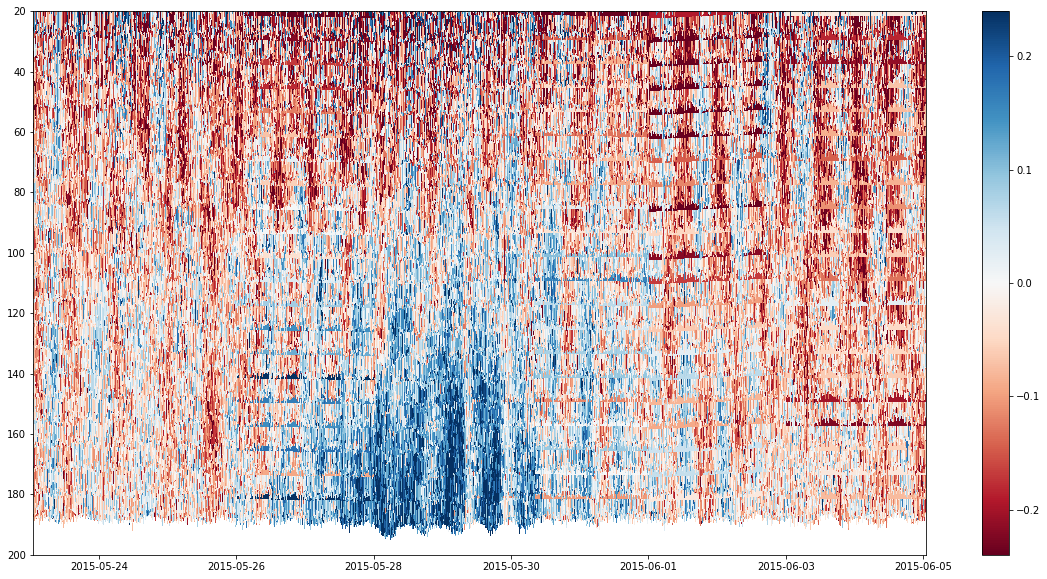

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
p = ax.pcolormesh(time, bin_depths, east, cmap='RdBu',vmin=-lim_east,vmax=lim_east)
ax.set_ylim(20,200)
ax.invert_yaxis()
fig.colorbar(p)

In [10]:
fig.savefig('out.png')

In [13]:
time = ds['time']

AttributeError: 'numpy.ndarray' object has no attribute 'to_list'

In [ ]:
# read in the data directly off THREDDS and write out as subsampled pickled pandas dataframe
num = 0
for i in datasets:
    ds = xr.open_dataset(i)
    ds = ds.swap_dims({'obs': 'time'})

    pressure_min = pd.DataFrame()
    pressure_min['bottom_pressure'] = ds['bottom_pressure'].to_pandas().resample('T').mean()
    del pressure_min.index.name

    pressure_min = pressure_min.dropna()

    out = 'minute_mean_data/' + i.split('/')[-1][:-3] + '_resampled' + '.pd'
    num = num +1

    with open(out, 'wb') as fh:
        pk.dump(pressure_min,fh)

    gc.collect()

In [ ]:
# datasets = ['https://opendap.oceanobservatories.org/thredds/dodsC/ooi/friedrich.knuth@rutgers.edu/20180423T142423-RS01SBPS-PC01A-05-ADCPTD102-streamed-adcp_velocity_beam/deployment0001_RS01SBPS-PC01A-05-ADCPTD102-streamed-adcp_velocity_beam_20150529T000000.660000-20150531T235959.850000.nc']
ds = xr.open_mfdataset(datasets)
ds = ds.swap_dims({'obs': 'time'})
ds = ds.chunk({'time': 100})

In [11]:
ds['correlation_magnitude_beam1']

<xarray.Dataset>
Dimensions:                         (bin: 30, time: 1402579)
Coordinates:
    obs                             (time) int64 dask.array<shape=(1402579,), chunksize=(100,)>
  * time                            (time) datetime64[ns] 2015-06-03T00:00:00.670000128 ...
    pressure                        (time) float64 dask.array<shape=(1402579,), chunksize=(100,)>
    lat                             (time) float64 dask.array<shape=(1402579,), chunksize=(100,)>
    lon                             (time) float64 dask.array<shape=(1402579,), chunksize=(100,)>
Dimensions without coordinates: bin
Data variables:
    deployment                      (time) int32 dask.array<shape=(1402579,), chunksize=(100,)>
    id                              (time) |S64 dask.array<shape=(1402579,), chunksize=(100,)>
    bin_1_distance                  (time) float32 dask.array<shape=(1402579,), chunksize=(100,)>
    cell_length                     (time) float32 dask.array<shape=(1402579,), chunks

In [ ]:
east

In [ ]:
x

In [ ]:
u_v_w = np.concatenate(east, north, up)
lim = float("%2.2f" % np.nanpercentile(abs(u_v_w), 90))

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
p = ax.pcolormesh(time, bins, east, cmap='RdBu',vmin=-lim,vmax=lim)
ax.set_ylim(20,200)
ax.invert_yaxis()
fig.colorbar(p)

In [ ]:
start = datetime.strptime('2015-05-29','%Y-%m-%d')
end = datetime.strptime('2015-05-30','%Y-%m-%d')

In [ ]:
ds_slice = ds.sel(time=slice(start, end))

In [ ]:
# horizontal_data = np.concatenate(north)


In [ ]:
fig, ax = plt.subplots()
p = ax.pcolormesh(time, bins, north, cmap='RdBu',vmin=-lim,vmax=lim)
ax.set_ylim(20,200)
ax.invert_yaxis()
cb = fig.colorbar(p)
cb.update_ticks()
cb.formatter.set_useOffset(False)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 6);
ax.invert_yaxis()
ax.grid()
ax.set_xlim(x[0],x[-1])
sc = plt.scatter(x, y, c=z)
cb = fig.colorbar(sc, ax=ax)
cb.update_ticks()
cb.formatter.set_useOffset(False)
plt.show()

In [ ]:
df = ds.to_dataframe()

In [ ]:
df_east = ds['eastward_seawater_velocity'].to_pandas()

In [ ]:
df_east

In [ ]:
df_east.index.get_level_values

In [ ]:
test = df['eastward_seawater_velocity'].resample('T').mean()

In [ ]:
    pressure_min = pd.DataFrame()
    pressure_min['bottom_pressure'] = ds['bottom_pressure'].to_pandas().resample('T').mean()

In [ ]:
ds.time.min()

In [ ]:
ds.time.max()

In [ ]:
ds1

In [ ]:
time = ds1['time'].values
bins = ds1['bin_depths'].values
north = ds1['northward_seawater_velocity'].values
east = ds1['eastward_seawater_velocity'].values
up = ds1['upward_seawater_velocity'].values

In [ ]:
fig, ax = plt.subplots()
ax.pcolormesh(time, bins, north)

fig.set_size_inches(16, 6);
# ax.invert_yaxis()
# ax.grid()
# ax.set_xlim(x[0],x[-1])
# sc = plt.scatter(x, y, c=z)
# cb = fig.colorbar(sc, ax=ax)
# cb.update_ticks()
# cb.formatter.set_useOffset(False)
# plt.show()